In [61]:
import pandas as pd
import numpy as np

# KNN- user data

In [33]:
user_df= pd.read_csv('user_data.csv')

In [34]:
user_df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [35]:
y = user_df["Purchased"].values

In [36]:
y[:10]

array(['0', '0', '0', '0', '0', '0', '0', '1', '0', '0'], dtype=object)

In [52]:
X=user_df[["EstimatedSalary"]].values

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn=KNeighborsClassifier(n_neighbors=6)

In [55]:
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=6)

In [56]:
y_pred = knn.predict(X)

In [68]:
X_new = np.array([[237000],
                  [107000],
                  [23000]])

In [69]:
y_pred=knn.predict(X_new)


In [70]:
y_pred

array(['1', '1', '0'], dtype=object)

# KNN - charn data set 

In [112]:
churn_df= pd.read_csv('Churn.csv')

In [114]:
d = {'yes': 1, 'no': 0}
churn_df=churn_df.replace(d)
churn_df = churn_df.drop(columns=['State','Area_Code','Phone'])

In [115]:
churn_df.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73


In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X = churn_df.drop("Churn", axis=1).values

In [118]:
y = churn_df["Churn"].values

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [132]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [133]:
print(knn.score(X_test, y_test))

0.8755622188905547


In [134]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
    # Set up a KNN Classifier
    knn=KNeighborsClassifier(n_neighbors=neighbor)
  
    # Fit the model
    knn.fit(X_train,y_train)
  
    # Compute accuracy
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.9047261815453863, 3: 0.9062265566391597, 4: 0.8930982745686422, 5: 0.8972243060765192, 6: 0.8900975243810952, 7: 0.8927231807951987, 8: 0.8878469617404351, 9: 0.8889722430607652, 10: 0.885596399099775, 11: 0.8882220555138785, 12: 0.8859714928732183} 
 {1: 0.8110944527736131, 2: 0.8710644677661169, 3: 0.8530734632683659, 4: 0.8680659670164917, 5: 0.8620689655172413, 6: 0.8755622188905547, 7: 0.8740629685157422, 8: 0.8755622188905547, 9: 0.8785607196401799, 10: 0.8770614692653673, 11: 0.8740629685157422, 12: 0.8725637181409296}


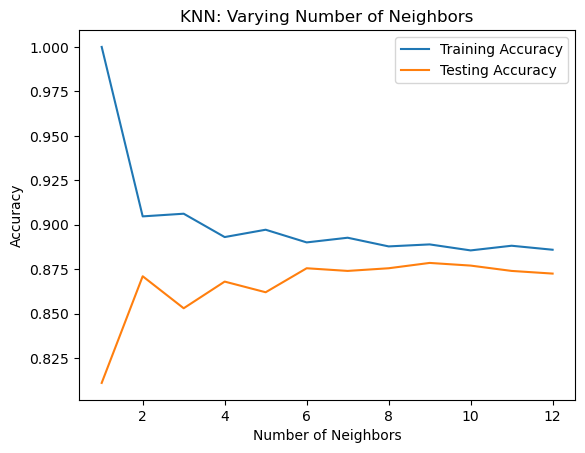

In [137]:
import matplotlib.pyplot as plt  
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

Great work! See how training accuracy decreases and test accuracy increases as the number of neighbors gets larger. For the test set, accuracy peaks with 7 neighbors, suggesting it is the optimal value for our model. Now let's explore regression models!